<a href="https://colab.research.google.com/github/zilioalberto/N3_PO/blob/main/N3_PO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##N3 -Pesquisa Operacional
##Professor Jaison
##Alunos:
#Alberto Zilio
#Roni Pereira


In [29]:
## Passo 01 - Bibliotecas do Projeto:

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística / distribuições (para Monte Carlo)
from scipy import stats

# Utilitário para trabalhar com caminhos

from pathlib import Path

# Configurações gerais de gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)





In [30]:
## Passo  02 - Importar o dataset do Git

# URL RAW do arquivo no GitHub (pode usar exatamente a que você mandou)
url = "https://raw.githubusercontent.com/zilioalberto/N3_PO/main/totaldata.csv"

# Ler o CSV – pelo que vi, o separador é ';'
df = pd.read_csv(url, sep=';')

# Mostrar as 5 primeiras linhas
df.head()


,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,JOINVILLE,420910201A,SC,Itinga,"-26,383","-48,82",2024-11-01 00:40:00.0,0
1,JOINVILLE,420910201A,SC,Itinga,"-26,383","-48,82",2024-11-01 01:40:00.0,0
2,JOINVILLE,420910201A,SC,Itinga,"-26,383","-48,82",2024-11-01 02:40:00.0,0
3,JOINVILLE,420910201A,SC,Itinga,"-26,383","-48,82",2024-11-01 03:40:00.0,0
4,JOINVILLE,420910201A,SC,Itinga,"-26,383","-48,82",2024-11-01 05:00:00.0,0


In [31]:
## Passo 03 - Tratamento básico e geração dos arquivos agregados

# 1) Converter datahora para datetime
df["datahora"] = pd.to_datetime(df["datahora"])

# 2) Garantir que valorMedida é numérico
df["valorMedida"] = pd.to_numeric(df["valorMedida"], errors="coerce")

# 3) Remover colunas que não serão usadas
colunas_remover = ["latitude", "longitude", "municipio", "uf", "codEstacao", "codigoestacao"]
df = df.drop(columns=colunas_remover, errors="ignore")

print("Colunas após remoção:")
print(df.columns)

# -------------------------------
# ARQUIVO 1: SOMA POR HORA CHEIA E ESTAÇÃO
# -------------------------------

# 4) Criar uma coluna com a hora inteira (suprimindo minutos/segundos)
df["datahora_hora"] = df["datahora"].dt.floor("H")

# 5) Agregar: somatório de valorMedida por hora cheia **e por estação**
dados_horarios = (
    df.groupby(["datahora_hora", "nomeEstacao"])["valorMedida"]
      .sum()
      .reset_index()
      .rename(columns={"datahora_hora": "datahora"})
)

# 6) Salvar arquivo horário
dados_horarios.to_csv("totaldata_horario_por_estacao.csv", index=False)

print("\nArquivo 1 (horário por estação) criado: totaldata_horario_por_estacao.csv")
print("Preview:")
print(dados_horarios.head())

# -----------------------------
# ARQUIVO 2: SOMA POR DIA E ESTAÇÃO
# -----------------------------

# 7) Criar coluna apenas com a data (sem hora)
df["data"] = df["datahora"].dt.date

# 8) Agregar: somatório de valorMedida por dia **e por estação**
dados_diarios = (
    df.groupby(["data", "nomeEstacao"])["valorMedida"]
      .sum()
      .reset_index()
)

# Converter coluna data de volta para datetime
dados_diarios["data"] = pd.to_datetime(dados_diarios["data"])

# 9) Salvar arquivo diário por estação
dados_diarios.to_csv("totaldata_diario_por_estacao.csv", index=False)

print("\nArquivo 2 (diário por estação) criado: totaldata_diario_por_estacao.csv")
print("Preview:")
print(dados_diarios.head())

# -----------------------------
# ARQUIVO 3: SÉRIE DIÁRIA DA CIDADE (SOMA, MÉDIA E Nº DE ESTAÇÕES)
# -----------------------------

chuva_diaria_cidade = (
    dados_diarios
    .groupby("data")["valorMedida"]
    .agg(
        soma_cidade="sum",      # soma da chuva em todas as estações nesse dia
        media_estacoes="mean",  # média da chuva entre as estações nesse dia
        n_estacoes="count"      # número de estações com dado nesse dia
    )
    .reset_index()
)

# 11) Salvar arquivo diário médio da cidade
chuva_diaria_cidade.to_csv("totaldata_diario_media_cidade.csv", index=False)

print("\nArquivo 3 (diário - cidade) criado: totaldata_diario_media_cidade.csv")
print("Preview:")
print(chuva_diaria_cidade.head())


Colunas após remoção:
Index(['nomeEstacao', 'datahora', 'valorMedida'], dtype='object')

Arquivo 1 (horário por estação) criado: totaldata_horario_por_estacao.csv
Preview:
    datahora            nomeEstacao  valorMedida
0 2024-11-01            Aventureiro          0.0
1 2024-11-01                 Centro          0.0
2 2024-11-01          Costa e Silva          0.0
3 2024-11-01  Estrada Geral Salto I          0.0
4 2024-11-01                 Iririu          0.0


/tmp/ipython-input-552213355.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["datahora_hora"] = df["datahora"].dt.floor("H")



Arquivo 2 (diário por estação) criado: totaldata_diario_por_estacao.csv
Preview:
        data            nomeEstacao  valorMedida
0 2024-11-01            Aventureiro          0.0
1 2024-11-01                 Centro          0.0
2 2024-11-01          Costa e Silva          0.0
3 2024-11-01  Estrada Geral Salto I          0.0
4 2024-11-01                 Iririu          0.0

Arquivo 3 (diário - cidade) criado: totaldata_diario_media_cidade.csv
Preview:
        data  soma_cidade  media_estacoes  n_estacoes
0 2024-11-01          0.0           0.000           8
1 2024-11-02          1.0           0.125           8
2 2024-11-03          0.0           0.000           8
3 2024-11-04          6.0           0.750           8
4 2024-11-05          0.0           0.000           8


In [33]:
## Passo 04 - Análise exploratória da chuva diária (média da cidade)

# 1) Ler o arquivo diário da cidade (gerado no passo 03)
df_cidade = pd.read_csv("totaldata_diario_media_cidade.csv", parse_dates=["data"])

# 2) Ordenar por data e definir o índice
df_cidade = df_cidade.sort_values("data").set_index("data")

# 3) Opcional: renomear a coluna de média para ficar mais autoexplicativa
df_cidade = df_cidade.rename(columns={"media_estacoes": "chuva_media_mm"})

print("Visão geral do dataframe:")
print(df_cidade.info(), "\n")

print("Primeiras linhas:")
display(df_cidade.head())

print("\nResumo estatístico da chuva diária média (mm):")
display(df_cidade["chuva_media_mm"].describe())

print("\nResumo estatístico da soma diária da cidade (mm):")
display(df_cidade["soma_cidade"].describe())

print("\nNúmero de estações por dia (n_estacoes):")
display(df_cidade["n_estacoes"].value_counts().sort_index())


Visão geral do dataframe:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-11-01 to 2025-10-31
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   soma_cidade     365 non-null    float64
 1   chuva_media_mm  365 non-null    float64
 2   n_estacoes      365 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.4 KB
None 

Primeiras linhas:


,soma_cidade,chuva_media_mm,n_estacoes
data,,,
2024-11-01,0.0,0.000,8
2024-11-02,1.0,0.125,8
2024-11-03,0.0,0.000,8
2024-11-04,6.0,0.750,8
2024-11-05,0.0,0.000,8



Resumo estatístico da chuva diária média (mm):


,chuva_media_mm
count,365.000000
mean,0.169057
std,0.651216
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.800000



Resumo estatístico da soma diária da cidade (mm):


,soma_cidade
count,365.000000
mean,1.068493
std,4.058395
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,44.000000



Número de estações por dia (n_estacoes):


,count
n_estacoes,
4,139
5,59
6,8
7,101
8,58


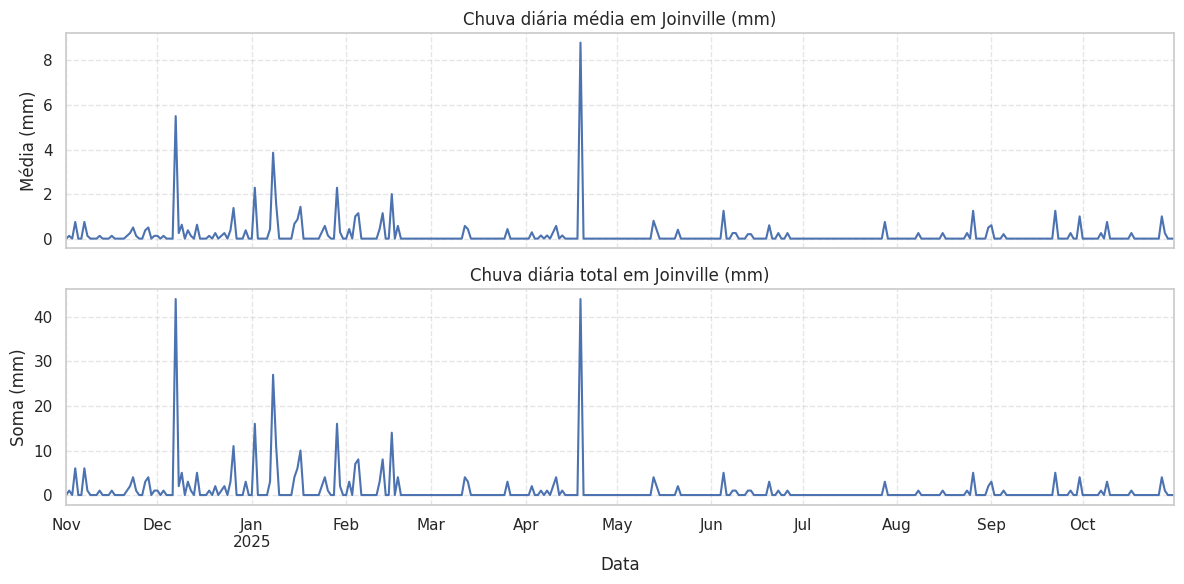

In [36]:
## 4.1 – Gráfico da série temporal (chuva ao longo do ano)

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Gráfico 1 – média
df_cidade["chuva_media_mm"].plot(ax=axes[0])
axes[0].set_title("Chuva diária média em Joinville (mm)")
axes[0].set_ylabel("Média (mm)")
axes[0].grid(True, linestyle="--", alpha=0.5)

# Gráfico 2 – soma
df_cidade["soma_cidade"].plot(ax=axes[1])
axes[1].set_title("Chuva diária total em Joinville (mm)")
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Soma (mm)")
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()



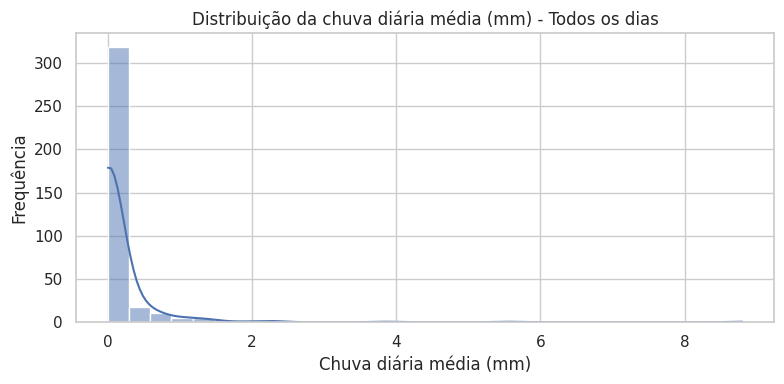

In [40]:
## 4.2 – Histograma da chuva diária (todos os dias)

plt.figure(figsize=(8, 4))
sns.histplot(df_cidade["chuva_media_mm"], bins=30, kde=True)

plt.title("Distribuição da chuva diária média (mm) - Todos os dias")
plt.xlabel("Chuva diária média (mm)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()



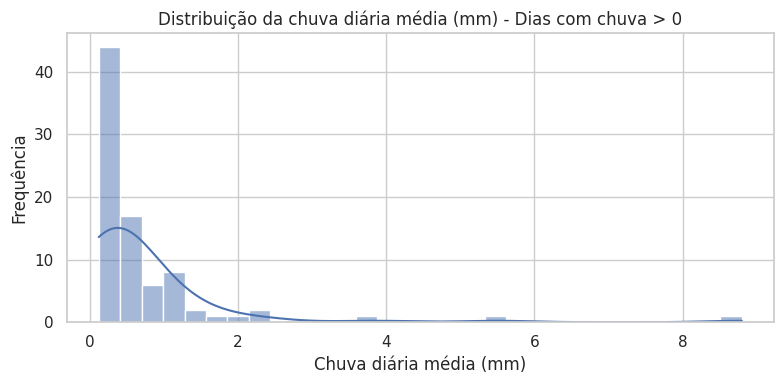

Resumo apenas dos dias com chuva > 0 mm:


,chuva_media_mm
count,84.000000
mean,0.734595
std,1.199743
min,0.125000
25%,0.250000
50%,0.387500
75%,0.750000
max,8.800000


In [39]:
## 4.3 – Histograma da chuva diária (apenas dias com chuva > 0 mm)

chuva_pos = df_cidade["chuva_media_mm"][df_cidade["chuva_media_mm"] > 0]

plt.figure(figsize=(8, 4))
sns.histplot(chuva_pos, bins=30, kde=True)

plt.title("Distribuição da chuva diária média (mm) - Dias com chuva > 0")
plt.xlabel("Chuva diária média (mm)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

print("Resumo apenas dos dias com chuva > 0 mm:")
display(chuva_pos.describe())




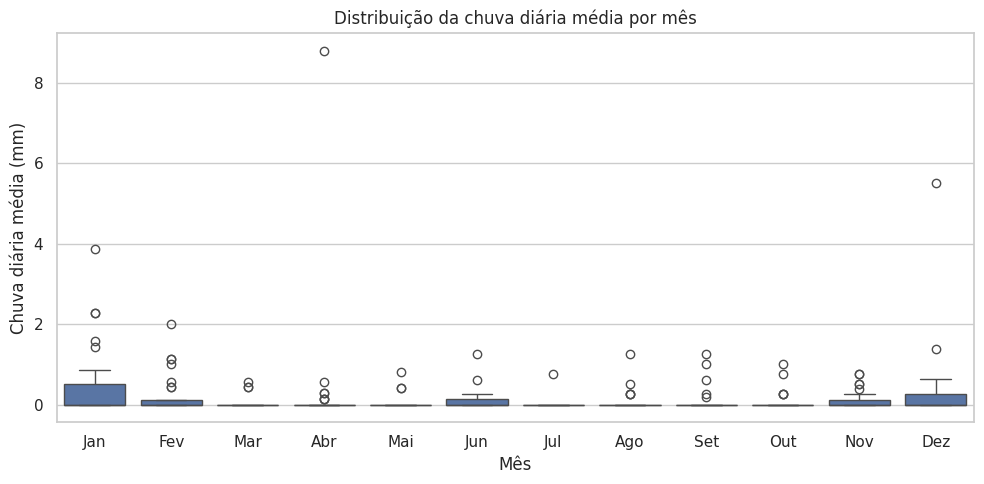

In [42]:
## 4.4 - Distribuição da chuva diária média por mês

df_cidade_mes = df_cidade.copy()

# Extrair o número do mês a partir do índice (que é datetime)
df_cidade_mes["mes"] = df_cidade_mes.index.month

# Nomes dos meses (em português)
mes_labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
              "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

plt.figure(figsize=(10, 5))

# order garante que os meses aparecem de 1 a 12 na ordem correta
sns.boxplot(
    data=df_cidade_mes,
    x="mes",
    y="chuva_media_mm",
    order=range(1, 13)
)

plt.title("Distribuição da chuva diária média por mês")
plt.xlabel("Mês")
plt.ylabel("Chuva diária média (mm)")

# Ajustar os rótulos do eixo X para nomes dos meses
plt.xticks(ticks=range(12), labels=mes_labels)

plt.tight_layout()
plt.show()


In [45]:
## Passo 06 - Comparação entre bairros (estações)

# 5.1 - Carregar o arquivo diário por estação
df_estacoes = pd.read_csv("totaldata_diario_por_estacao.csv", parse_dates=["data"])

print("Visão geral da base diária por estação:")
print(df_estacoes.info(), "\n")

print("Primeiras linhas:")
display(df_estacoes.head())

print("\nEstações (bairros) disponíveis:")
print(df_estacoes["nomeEstacao"].unique())


Visão geral da base diária por estação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         2070 non-null   datetime64[ns]
 1   nomeEstacao  2070 non-null   object        
 2   valorMedida  2070 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 48.6+ KB
None 

Primeiras linhas:


,data,nomeEstacao,valorMedida
0,2024-11-01,Aventureiro,0.0
1,2024-11-01,Centro,0.0
2,2024-11-01,Costa e Silva,0.0
3,2024-11-01,Estrada Geral Salto I,0.0
4,2024-11-01,Iririu,0.0



Estações (bairros) disponíveis:
['Aventureiro' 'Centro' 'Costa e Silva' 'Estrada Geral Salto I' 'Iririu'
 'Itinga' 'Nova Brasília' 'Paranaguamirim']


In [46]:
## 5.2 - Estatísticas de chuva por estação

estat_estacoes = (
    df_estacoes
    .groupby("nomeEstacao")["valorMedida"]
    .agg(
        total_chuva_mm = "sum",
        media_diaria_mm = "mean",
        max_diaria_mm = "max",
        dias_com_chuva = lambda x: (x > 0).sum()
    )
    .reset_index()
)

# Ordenar pela chuva total (do maior para o menor)
estat_estacoes = estat_estacoes.sort_values("total_chuva_mm", ascending=False)

print("Estatísticas por estação (bairros):")
display(estat_estacoes)


Estatísticas por estação (bairros):


,nomeEstacao,total_chuva_mm,media_diaria_mm,max_diaria_mm,dias_com_chuva
6,Nova Brasília,390.0,1.068493,44.0,84
0,Aventureiro,0.0,0.000000,0.0,0
2,Costa e Silva,0.0,0.000000,0.0,0
1,Centro,0.0,0.000000,0.0,0
3,Estrada Geral Salto I,0.0,0.000000,0.0,0
4,Iririu,0.0,0.000000,0.0,0
5,Itinga,0.0,0.000000,0.0,0
7,Paranaguamirim,0.0,0.000000,0.0,0
